In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.RecomendadorClimatico import RecomendadorClimatico
from src.Transformaciones import Transformaciones
from src.AgregarPH import CargaData, AgregarPH

In [9]:
path = '../data/raw/ANN'

In [3]:
# 2.Importación fuente de datos

In [10]:
carga = CargaData(path+'/data.csv')
df = carga.obtener_data()
agregar_ph = AgregarPH(df)
df_con_ph = agregar_ph.generar_ph_mensual()
df_con_ph.to_csv(path+"/df_con_ph.csv", index=False)

In [12]:
#Lectura datos históricos
df = pd.read_csv(path+'/df_con_ph.csv',encoding = "ISO-8859-1",delimiter=',')

In [13]:
"""
Fuente: NASA/POWER – Resolución nativa mensual y anual
Fechas (mes/día/año): del 01/01/1981 al 31/12/2025 en hora solar local (LST)
Ubicación: Latitud 9.8062  Longitud -83.8448
Elevación según MERRA-2: Promedio para una región de 0.5 x 0.625 grados de latitud/longitud = 1064.94 metros
Valor para datos faltantes que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes: -999
Parámetro(s):
- PRECTOTCORR: Precipitación corregida de MERRA-2 (mm/día)
- PRECTOTCORR_SUM: Suma de la precipitación corregida de MERRA-2 (mm/día)
- QV2M: Humedad específica a 2 metros según MERRA-2 (g/kg)
- RH2M: Humedad relativa a 2 metros según MERRA-2 (%)
- T2M: Temperatura a 2 metros según MERRA-2 (°C)
- T2M_MAX: Temperatura máxima a 2 metros según MERRA-2 (°C)
- T2M_MIN: Temperatura mínima a 2 metros según MERRA-2 (°C)
"""

'\nFuente: NASA/POWER – Resolución nativa mensual y anual\nFechas (mes/día/año): del 01/01/1981 al 31/12/2025 en hora solar local (LST)\nUbicación: Latitud 9.8062  Longitud -83.8448\nElevación según MERRA-2: Promedio para una región de 0.5 x 0.625 grados de latitud/longitud = 1064.94 metros\nValor para datos faltantes que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes: -999\nParámetro(s):\n- PRECTOTCORR: Precipitación corregida de MERRA-2 (mm/día)\n- PRECTOTCORR_SUM: Suma de la precipitación corregida de MERRA-2 (mm/día)\n- QV2M: Humedad específica a 2 metros según MERRA-2 (g/kg)\n- RH2M: Humedad relativa a 2 metros según MERRA-2 (%)\n- T2M: Temperatura a 2 metros según MERRA-2 (°C)\n- T2M_MAX: Temperatura máxima a 2 metros según MERRA-2 (°C)\n- T2M_MIN: Temperatura mínima a 2 metros según MERRA-2 (°C)\n'

In [14]:
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
0,PRECTOTCORR,1981,2.64,3.32,1.72,6.02,6.66,11.86,3.34,9.65,...,4.88,5.49,3.08,6.50,6.27,3.24,4.89,4.47,3.49,7.82
1,PRECTOTCORR,1982,3.30,2.99,1.35,3.71,8.90,2.92,8.43,4.88,...,8.03,8.90,4.23,8.58,5.95,4.46,3.66,4.87,6.75,7.49
2,PRECTOTCORR,1983,1.38,0.09,0.93,3.76,3.01,4.61,5.27,5.66,...,5.74,5.02,6.82,4.33,5.21,3.18,3.99,5.00,6.33,3.52
3,PRECTOTCORR,1984,0.69,1.01,0.60,2.72,4.78,5.78,4.80,6.55,...,5.84,6.99,5.12,8.10,5.80,4.15,4.55,6.80,5.68,8.93
4,PRECTOTCORR,1985,1.94,0.41,0.50,0.84,2.21,8.02,5.41,4.31,...,8.46,7.10,5.58,8.39,5.77,7.62,3.44,7.81,3.70,8.93


In [15]:
df.tail()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
310,T2M_MIN,2021,13.59,15.41,13.38,15.34,15.95,15.07,16.23,15.62,...,6.69,3.74,7.58,4.59,6.73,6.99,4.44,8.94,7.95,8.30
311,T2M_MIN,2022,15.20,12.54,14.26,15.80,16.22,15.30,16.29,15.27,...,5.81,5.66,7.23,5.30,4.06,3.02,5.29,6.08,7.23,7.51
312,T2M_MIN,2023,14.71,13.53,15.29,14.76,16.99,15.81,16.89,17.24,...,3.79,5.07,8.86,3.96,3.07,6.72,5.92,8.35,3.83,7.06
313,T2M_MIN,2024,15.93,13.93,14.21,14.95,16.76,17.71,16.85,17.28,...,5.04,3.53,7.40,7.95,6.53,7.98,6.77,3.67,5.33,7.34
314,T2M_MIN,2025,14.90,15.61,15.96,16.50,-999.00,-999.00,-999.00,-999.00,...,6.76,7.00,3.77,3.29,6.98,7.03,6.69,4.87,6.48,5.32


In [16]:
#Notamos que anno 2025 como NO ha fanilizado tiene valores -999, esto afectaria el molode
#por lo que el grupo decide eliminar esta columna

In [17]:
# Filtrar los datos para eliminar el año 2025
df = df[df['YEAR'] != 2025]

In [18]:
df.to_csv(path+"/df_sin_2025.csv", index=False)

In [20]:
recomendador = RecomendadorClimatico(path+"/df_sin_2025.csv", path+"/datos_con_recomendaciones_completo.csv")
recomendador.procesar()

✅ Archivo generado: ../data/raw/ANN/datos_con_recomendaciones_completo.csv


In [21]:
#Lectura datos nuevos
df = pd.read_csv(path+'/datos_con_recomendaciones_completo.csv',encoding = "ISO-8859-1",delimiter=',')

In [22]:
# 3.Análisis de Datos (EDA) + Preprocesado

In [23]:
df["Recomendacion"].value_counts()

Recomendacion
fertilizacion      207
poda_preventiva    167
riego              154
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           528 non-null    int64  
 1   MONTH          528 non-null    object 
 2   lluvia_mm      528 non-null    float64
 3   temp_max       528 non-null    float64
 4   temp_min       528 non-null    float64
 5   humedad        528 non-null    float64
 6   ph_suelo       528 non-null    float64
 7   Recomendacion  528 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 33.1+ KB


In [25]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

YEAR             0
MONTH            0
lluvia_mm        0
temp_max         0
temp_min         0
humedad          0
ph_suelo         0
Recomendacion    0
dtype: int64

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,528.0,2002.500000,12.710467,1981.00,1991.7500,2002.500,2013.2500,2024.00
lluvia_mm,528.0,5.246534,3.767827,0.02,2.4450,4.700,7.2400,25.99
temp_max,528.0,26.288277,1.649643,23.34,25.1700,25.950,27.0150,31.78
temp_min,528.0,15.276458,1.118109,11.92,14.5800,15.300,16.0800,18.14
humedad,528.0,88.266098,4.373132,73.32,85.9525,89.555,91.3850,94.48
ph_suelo,528.0,5.994943,1.686927,3.00,4.5450,5.950,7.5025,8.95


In [27]:
df

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,6.25,riego
1,1982,JAN,3.30,24.54,14.02,89.43,6.58,poda_preventiva
2,1983,JAN,1.38,26.13,15.75,88.61,3.14,fertilizacion
3,1984,JAN,0.69,23.68,13.14,87.41,3.89,fertilizacion
4,1985,JAN,1.94,23.45,14.37,86.96,6.11,riego
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,3.51,fertilizacion
524,2021,DEC,4.18,24.62,16.47,91.61,7.90,poda_preventiva
525,2022,DEC,3.39,24.12,15.47,90.88,8.67,poda_preventiva
526,2023,DEC,4.84,25.70,16.68,91.62,3.69,fertilizacion


In [28]:
#Transformaciones

#riego:1
#fertilizacion: 2
#poda_preventiva: 3

In [29]:
transformador = Transformaciones()
transformador.recomendacion_num(df)

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,6.25,1
1,1982,JAN,3.30,24.54,14.02,89.43,6.58,3
2,1983,JAN,1.38,26.13,15.75,88.61,3.14,2
3,1984,JAN,0.69,23.68,13.14,87.41,3.89,2
4,1985,JAN,1.94,23.45,14.37,86.96,6.11,1
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,3.51,2
524,2021,DEC,4.18,24.62,16.47,91.61,7.90,3
525,2022,DEC,3.39,24.12,15.47,90.88,8.67,3
526,2023,DEC,4.84,25.70,16.68,91.62,3.69,2


In [22]:
#Plots

<Axes: xlabel='Recomendacion', ylabel='count'>

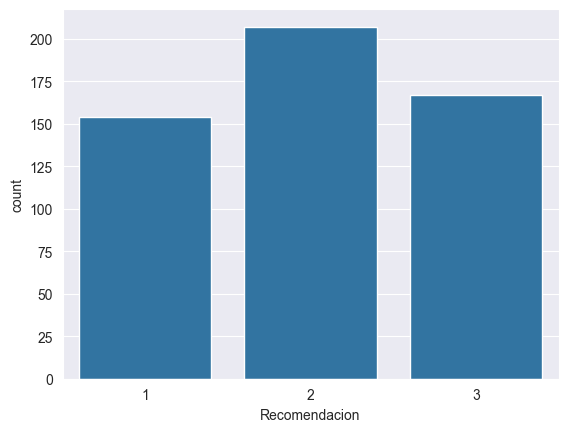

In [30]:
#Verificar si hay una proporción equilibrada entre los diferentes valores de la variable objetivo para un buen modelado posterior
sns.countplot(x='Recomendacion',data=df)

(10.0, 0.0)

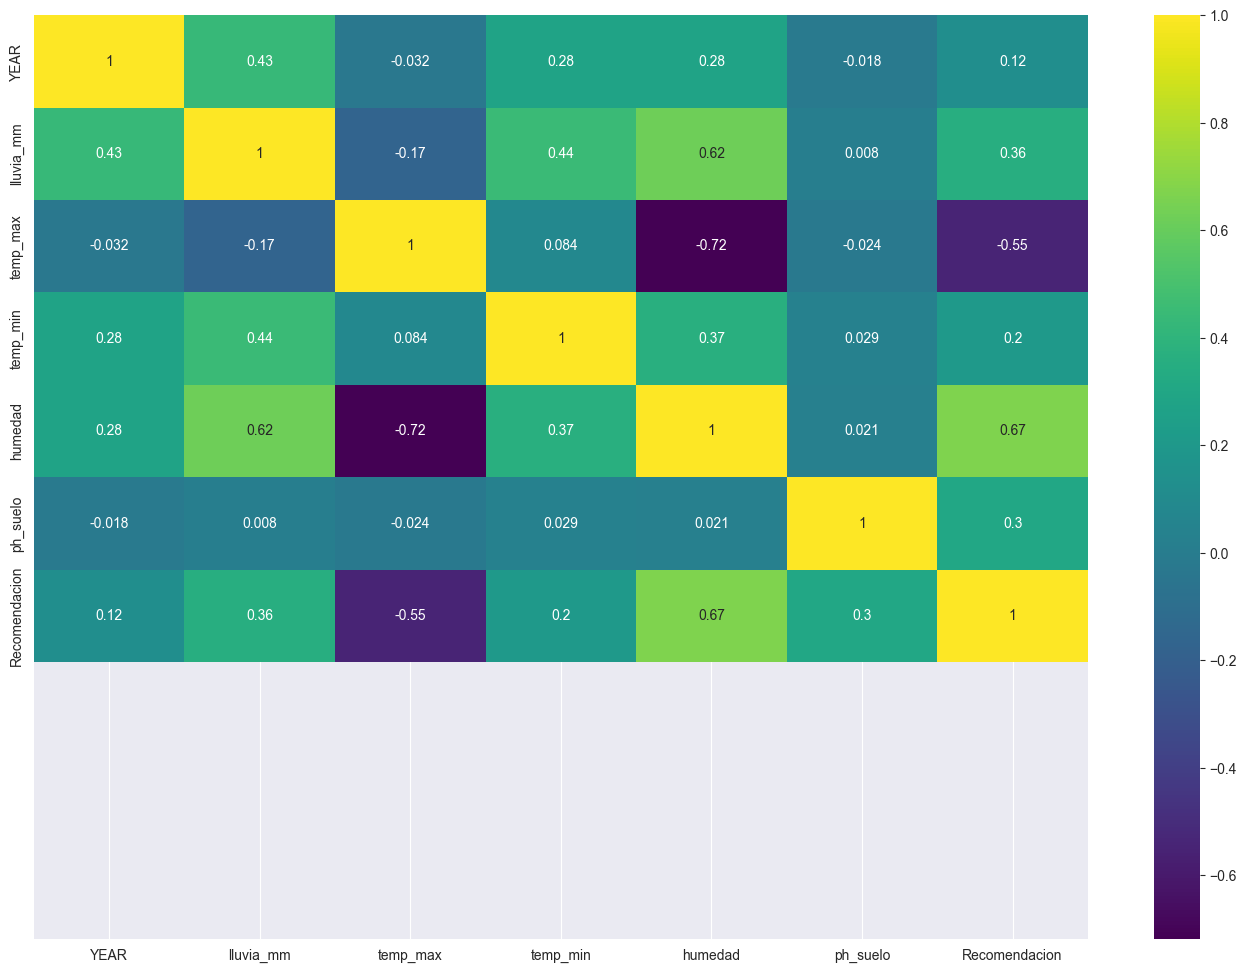

In [31]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [32]:
df.corr(numeric_only = True)['Recomendacion'].sort_values()

temp_max        -0.546933
YEAR             0.122388
temp_min         0.204300
ph_suelo         0.302048
lluvia_mm        0.357263
humedad          0.668818
Recomendacion    1.000000
Name: Recomendacion, dtype: float64

<Axes: >

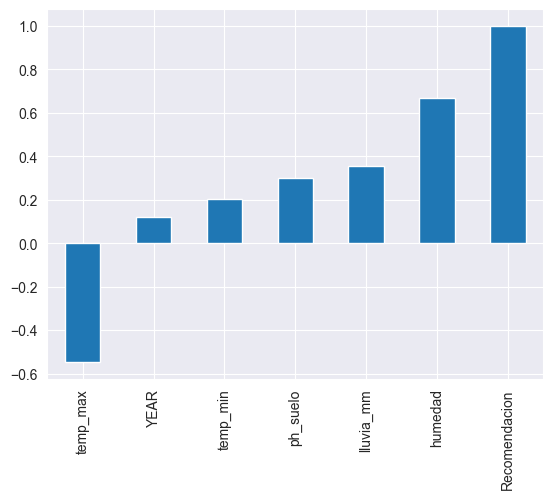

In [33]:
df.corr(numeric_only = True)['Recomendacion'].sort_values().plot(kind='bar')

In [34]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler()

# columnas numéricas:
normalizar = ['lluvia_mm', 'temp_max', 'temp_min', 'humedad', 'ph_suelo']

# Aplica la normalización
df[normalizar] = escalador.fit_transform(df[normalizar])


In [35]:
df

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,0.100886,0.066351,0.364952,0.731096,0.546218,1
1,1982,JAN,0.126300,0.142180,0.337621,0.761342,0.601681,3
2,1983,JAN,0.052368,0.330569,0.615756,0.722590,0.023529,2
3,1984,JAN,0.025799,0.040284,0.196141,0.665879,0.149580,2
4,1985,JAN,0.073931,0.013033,0.393891,0.644612,0.522689,1
...,...,...,...,...,...,...,...,...
523,2020,DEC,0.413939,0.109005,0.265273,0.876654,0.085714,2
524,2021,DEC,0.160185,0.151659,0.731511,0.864367,0.823529,3
525,2022,DEC,0.129765,0.092417,0.570740,0.829868,0.952941,3
526,2023,DEC,0.185599,0.279621,0.765273,0.864839,0.115966,2


In [29]:
df.to_csv("../data/processed/ANN/recomendaciones.csv", index=False)